In [17]:
#imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [18]:
#variables
path_name = "/Users/slon/Downloads/test.png"

In [19]:
#display function
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

(493, 535)


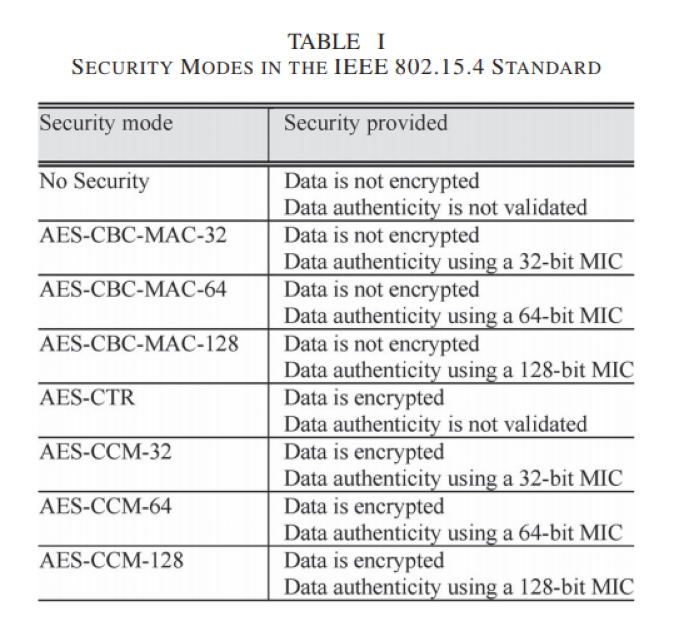

In [20]:
#open image
img = cv2.imread(path_name, 0)
print(img.shape)
if len(img.shape) != 2:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray = img
display(path_name)

In [21]:
#morphological operations with image to remove lines
gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
cv2.THRESH_BINARY, 15, -2)

horizontal = np.copy(bw)

cols = horizontal.shape[1]
print(cols)
horizontal_size = cols // 30
print(horizontal_size)

horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))

horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)

cv2.imwrite("horizontal_lines_extracted.png", horizontal)

horizontal_inv = cv2.bitwise_not(horizontal)
cv2.imwrite("inverse_extracted.png", horizontal_inv)

masked_img = cv2.bitwise_and(gray, gray, mask=horizontal_inv)
vertical = np.copy(bw)

rows = vertical.shape[0]
verticalsize = rows // 30

    # Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))

    # Apply morphology operations
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)

vertical_inv = cv2.bitwise_not(vertical)
cv2.imwrite("inverse_extracted_vertical.png", vertical_inv)

prefinal = cv2.bitwise_and(masked_img, masked_img, mask = vertical_inv)

535
17


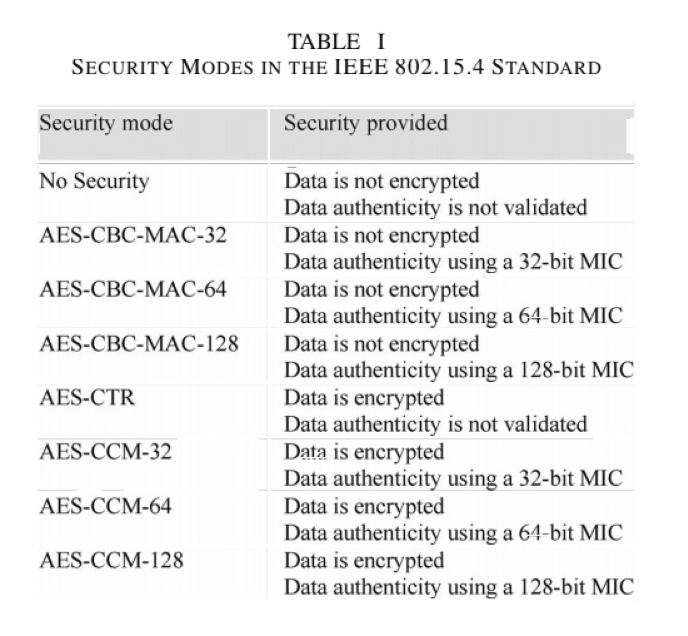

In [22]:
#save file
final = cv2.bitwise_not(prefinal)
cv2.imwrite("final.jpg", final)
display("final.jpg")